**Import necessary libraries**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import gaussian, sobel
from skimage import exposure
from copy import deepcopy



In [13]:
bird = io.imread('/content/bird.jpeg')


array([[[247, 192, 128],
        [247, 192, 128],
        [248, 193, 129],
        ...,
        [248, 199, 141],
        [248, 199, 141],
        [248, 199, 141]],

       [[247, 192, 128],
        [247, 192, 128],
        [248, 193, 129],
        ...,
        [248, 199, 141],
        [248, 199, 141],
        [248, 199, 141]],

       [[247, 192, 128],
        [247, 192, 128],
        [248, 193, 129],
        ...,
        [248, 199, 140],
        [248, 199, 140],
        [248, 199, 140]],

       ...,

       [[181, 159,  48],
        [181, 159,  48],
        [181, 159,  48],
        ...,
        [205, 182,  89],
        [206, 183,  90],
        [206, 183,  90]],

       [[181, 159,  48],
        [181, 159,  48],
        [181, 159,  48],
        ...,
        [205, 182,  89],
        [206, 183,  90],
        [206, 183,  90]],

       [[181, 159,  48],
        [181, 159,  48],
        [181, 159,  48],
        ...,
        [205, 182,  89],
        [206, 183,  90],
        [206, 183,  90]]], dtype=uint8)
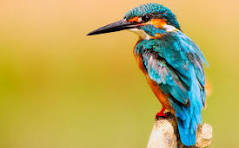

In [14]:
bird

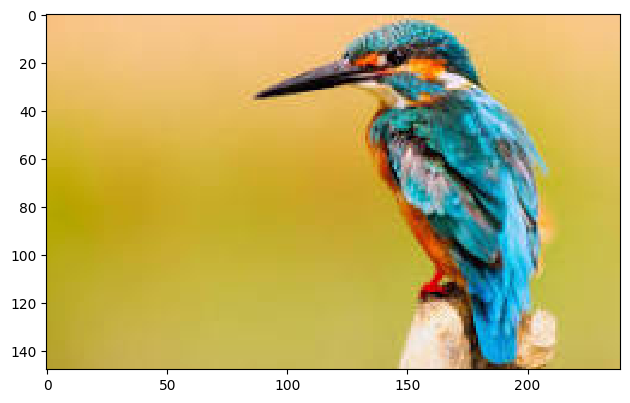

In [15]:
io.imshow('/content/bird.jpeg')

**Slicing image into red , green and blue channels**

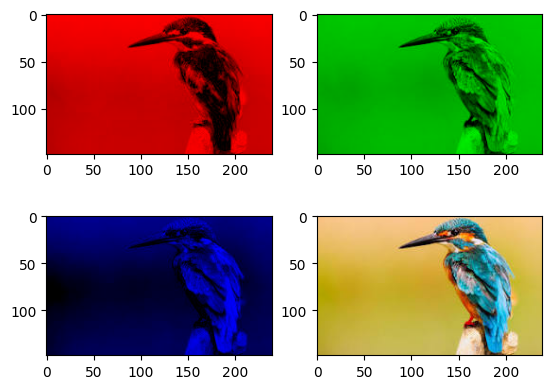

In [16]:
red_channel=deepcopy(bird)
blue_channel=deepcopy(bird)
green_channel=deepcopy(bird)



red_channel[:,:,1]=0
red_channel[:,:,2]=0
green_channel[:,:,0]=0
green_channel[:,:,2]=0
blue_channel[:,:,0]=0
blue_channel[:,:,1]=0
fig,ax=plt.subplots(ncols=2,nrows=2)
ax[0,0].imshow(red_channel)
ax[0,1].imshow(green_channel)
ax[1,0].imshow(blue_channel)
ax[1,1].imshow(bird)

**Converting the image to grayscale and Displaying grayscale image**

Text(0.5, 1.0, 'Grayscale Image')

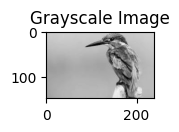

In [17]:

gray_image = rgb2gray(bird)


plt.subplot(2, 4, 5)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')



 **Histograms of pixel intensity distributions for each channel and grayscale image**

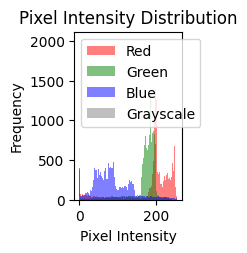

In [18]:

plt.subplot(2, 4, 6)
plt.hist(bird[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
plt.hist(bird[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
plt.hist(bird[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.5, label='Grayscale')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

**Applying Gaussian blur and Sobel edge detection to the original image**

<ipython-input-19-6366e4b5bd58>:1: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_image = gaussian(bird, sigma=1, multichannel=True)


Text(0.5, 1.0, 'Edges (Sobel)')

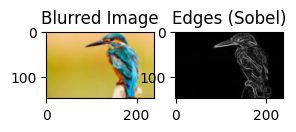

In [19]:

blurred_image = gaussian(bird, sigma=1, multichannel=True)
edges = sobel(rgb2gray(bird))
plt.subplot(2, 4, 7)
plt.imshow(blurred_image)
plt.title('Blurred Image')

plt.subplot(2, 4, 8)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Sobel)')




**Enhancing contrast of grayscale image and Displaying enhanced image**

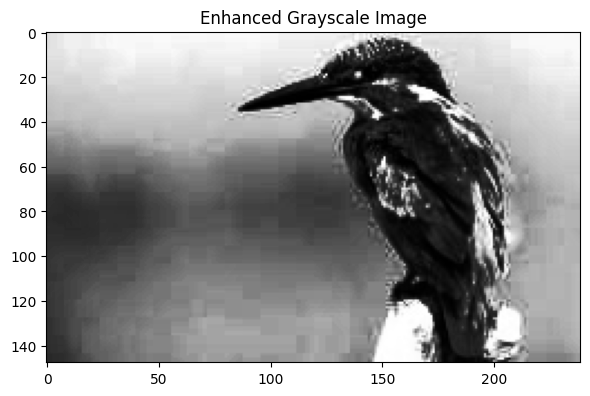

In [20]:
enhanced_image = exposure.equalize_hist(gray_image)
plt.figure(figsize=(6, 4))
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Grayscale Image')
plt.tight_layout()
plt.show()